# pytorch
PyTorch 是由 Facebook 主导开发的深度学习框架，因其高效的计算过程以及良好的易用性被诸多大公司和科研人员所喜爱。18 年 5 月，PyTorch 正式宣布集成 Caffe2 和 ONNX 的功能，这是一次让业界期待的更新。本次实验中，我们将从整体上熟悉 PyTorch，并深入学习常用组件的使用。

知识点
张量类型和定义
索引、切片、变换
张量的内部结构
自动微分 Autograd
深度学习框架对比


PyTorch 作为深度学习的框架，其实就提供了 2 个核心功能：

高效率的张量计算，同时支持强大的 GPU 加速计算功能。
搭建深度神经网络，构建在自动求导系统之上的网络结构。

### Package（包） | Description（描述）

| **Package**               | **Description**                                                                 |
|---------------------------|---------------------------------------------------------------------------------|
| `torch`                   | 张量计算组件，兼容 NumPy 数组，且具备强大的 GPU 加速支持。                        |
| `torch.autograd`          | 自动微分组件，是 PyTorch 的核心特点，支持 `torch` 中所有可微分的张量操作。        |
| `torch.nn`                | 深度神经网络组件，用于灵活构建不同架构的深度神经网络。                            |
| `torch.optim`             | 优化计算组件，囊括了 SGD、RMSProp、LBFGS、Adam 等常用的参数优化方法。             |
| `torch.multiprocessing`   | 多进程管理组件，方便实现相同数据的不同进程中共享视图。                            |
| `torch.utils`             | 工具函数组件，包含数据加载、训练等常用函数。                                      |
| `torch.legacy(.nn/.optim)`| 向后兼容组件，包含移植的旧代码。                                                  |

https://pytorch.org/docs/stable/index.html

我们都知道，张量 Tensor 在深度学习中充当着空气的角色，神经网络结构中的每一次输入和输出其实就是针对张量的计算过程。所以，PyTorch 最核心的组件也就是张量计算组件。PyTorch 张量的最大特点之一是兼容 NumPy 数组，且具备强大的 GPU 加速支持。所以，如果你对 NumPy 较为熟悉，那么入门就会简单很多。

下面，我们就来学习如何在 PyTorch 中去定义张量，并对其进行运算。首先，介绍 PyTorch 中支持的 Tensor 类型。目前，PyTorch 提供了 7 种 CPU 支持的 Tensor 类型和 8 种 GPU 支持的 Tensor 类型，它们分别是

### 数据类型 (dtype) | CPU 张量 | GPU 张量

| **数据类型**               | **CPU 张量**            | **GPU 张量**                  |
|----------------------------|-------------------------|------------------------------|
| 32-bit 浮点                | `torch.FloatTensor`     | `torch.cuda.FloatTensor`     |
| 64-bit 浮点                | `torch.DoubleTensor`    | `torch.cuda.DoubleTensor`    |
| 16-bit 半精度浮点          | N/A                    | `torch.cuda.HalfTensor`      |
| 8-bit 无符号整形 (0~255)   | `torch.ByteTensor`      | `torch.cuda.ByteTensor`      |
| 8-bit 有符号整形 (-128~127)| `torch.CharTensor`      | `torch.cuda.CharTensor`      |
| 16-bit 有符号整形          | `torch.ShortTensor`     | `torch.cuda.ShortTensor`     |
| 32-bit 有符号整形          | `torch.IntTensor`       | `torch.cuda.IntTensor`       |
| 64-bit 有符号整形          | `torch.LongTensor`      | `torch.cuda.LongTensor`      |

In [4]:
import torch as t

t.Tensor().dtype  

# 默认的是32位 ，单精度是32 双精度是64

t.set_default_tensor_type('torch.FloatTensor')
t.Tensor().dtype

torch.float32

In [3]:
t.set_default_tensor_type('torch.DoubleTensor')
t.Tensor().dtype

torch.float64

In [5]:
# 创建torch张量

t.Tensor([1, 2, 3])

tensor([1., 2., 3.])

In [7]:
import numpy as np

t.Tensor(np.random.randn(3))  # randn 是返回-1~1随机数

tensor([-2.6369,  1.1848, -1.2950])

In [8]:
t.Tensor([[1, 2], [3, 4], [5, 6]]).shape

torch.Size([3, 2])

与 NumPy 类似，PyTorch 也有许多其他的方法可以快速创建特定类型的 Tensor：

### 方法 | 描述

| **方法**                  | **描述**                                      |
|---------------------------|-----------------------------------------------|
| `ones(*sizes)`            | 创建全为 1 的 Tensor                          |
| `zeros(*sizes)`           | 创建全为 0 的 Tensor                          |
| `eye(*sizes)`             | 创建对角线为 1，其他为 0 的 Tensor            |
| `arange(s, e, step)`      | 创建从 s 到 e，步长为 step 的 Tensor          |
| `linspace(s, e, steps)`   | 创建从 s 到 e，均匀切分成 steps 份的 Tensor   |
| `rand/randn(*sizes)`      | 创建均匀/标准分布的 Tensor                    |
| `normal(mean, std)`       | 创建正态分布分布的 Tensor                     |
| `randperm(m)`             | 创建随机排列的 Tensor                         |

还记得 TensorFlow 中如何查看张量的数值并进行运算吗？如果我们不开启 Eager Execution，那么每次都需要初始化变量并新建会话才能执行。PyTorch 就方便太多，它能够向使用 NumPy 一样直观。如果你有 NumPy 使用基础，就能快速过渡并学会使用 PyTorch 处理张量。

学会 Tensor 的花式创建方法之后，我们再了解一下 Tensor 的基本运算。首先，两个 Tensor 是可以直接相互加减的，但要保证形状一致：

In [9]:
a = t.Tensor([[1, 2], [3, 4]])
b = t.Tensor([[5, 6], [7, 8]])

print(a + b)
print(a - b)

tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[-4., -4.],
        [-4., -4.]])


除此之外，我们可以针对 Tensor 执行求和、求均值、求标准差等操作。详细包括：

## 数值计算方法

### 统计相关
| 方法          | 描述           |
|---------------|----------------|
| mean          | 均值           |
| sum           | 和             |
| median        | 中位数         |
| mode          | 众数           |
| norm          | 范数           |
| dist          | 距离           |
| std           | 标准差         |
| var           | 方差           |
| cumsum        | 累加           |
| cumprod       | 累乘           |

### 数学运算
| 方法          | 描述           |
|---------------|----------------|
| abs           | 绝对值         |
| sqrt          | 平方根         |
| div           | 除法           |
| exp           | 指数           |
| fmod          | 求余           |
| log           | 自然对数       |
| pow           | 求幂           |
| cos           | 余弦           |
| sin           | 正弦           |
| asin          | 反正弦         |
| atan2         | 反正切         |
| cosh          | 双曲余弦       |
| ceil          | 上取整         |
| round         | 四舍五入       |
| floor         | 下取整         |
| trunc         | 只保留整数部分 |
| clamp(input, min, max) | 超过 min 和 max 部分截断 |
| sigmoid       | 常用激活函数   |
| tanh          | 常用激活函数   |

注意，很多时候我们都需要通过 dim= 参数去指定操作的维度，正如 NumPy 中的 axis= 参数。

In [11]:
# 对 a 求列平均
print(a.mean(dim=0))
# a 中的每个元素求平方
print(a.pow(2))
# a 中的每个元素传入 sigmoid 函数
print(a.sigmoid())

tensor([2., 3.])
tensor([[ 1.,  4.],
        [ 9., 16.]])
tensor([[0.7311, 0.8808],
        [0.9526, 0.9820]])


## 矩阵操作方法

| 方法       | 描述                       |
|------------|----------------------------|
| trace      | 对角线元素之和             |
| diag       | 对角线元素                 |
| triu       | 上三角矩阵                 |
| tril       | 下三角矩阵                 |
| mm         | 矩阵乘法                   |
| t          | 转置                       |
| inverse    | 求逆矩阵                   |
| svd        | 奇异值分解                 |

其中，mm 是 matmul 的缩写，也就是矩阵的叉乘。

In [12]:
b.mm(a), b.matmul(a)

(tensor([[23., 34.],
         [31., 46.]]),
 tensor([[23., 34.],
         [31., 46.]]))

# 索引切片与变换

我们可能只需要使用 Tensor 的一部分，就需要用到索引和切片操作了。PyTorch 中的这两个操作和 NumPy 同样非常相似，所以大家在使用时是非常方便的。

In [13]:
c = t.rand(5, 4)
c

tensor([[0.7102, 0.8121, 0.5331, 0.7275],
        [0.7236, 0.4481, 0.1134, 0.3634],
        [0.1128, 0.3753, 0.8576, 0.4678],
        [0.4369, 0.4140, 0.8778, 0.2045],
        [0.6558, 0.1448, 0.8989, 0.6180]])

In [14]:
# 取第 1 行
c[0]

tensor([0.7102, 0.8121, 0.5331, 0.7275])

In [15]:
# 取第 1 列
c[:, 0]

tensor([0.7102, 0.7236, 0.1128, 0.4369, 0.6558])

In [16]:
# 取第 2, 3 行与 3, 4 列
c[1:3, 2:4]

tensor([[0.1134, 0.3634],
        [0.8576, 0.4678]])

In [17]:
c.reshape(4, 5)

tensor([[0.7102, 0.8121, 0.5331, 0.7275, 0.7236],
        [0.4481, 0.1134, 0.3634, 0.1128, 0.3753],
        [0.8576, 0.4678, 0.4369, 0.4140, 0.8778],
        [0.2045, 0.6558, 0.1448, 0.8989, 0.6180]])

In [18]:
c.view(4, 5)

tensor([[0.7102, 0.8121, 0.5331, 0.7275, 0.7236],
        [0.4481, 0.1134, 0.3634, 0.1128, 0.3753],
        [0.8576, 0.4678, 0.4369, 0.4140, 0.8778],
        [0.2045, 0.6558, 0.1448, 0.8989, 0.6180]])

对应，reshape()，resize() 和 view()，三者直接的区别在于：resize() 和 view() 执行变换时和原 Tensor 共享内存，即修改一个，另外一个也会跟着改变。而 reshape() 则会复制到新的内存区块上。

reshape保险一些

张量的内部结构
上面介绍了 Tensor 的创建、计算、变换方法。最后，我们来看一下 Tensor 的内部结构。PyTorch 张量大致由两部分组成，分别是信息区（Tensor）和存储区（Storage）。其中，信息区保存 Tensor 的形状、数据类型等属性，而储存区则保留着真正的数据。
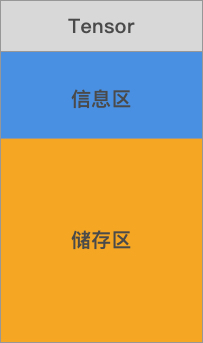
接下来，我们查看张量 storge 区块数据变化情况。

In [19]:
d = t.rand(3, 2)  # 生成一个随机张量
d

tensor([[0.2069, 0.2231],
        [0.6157, 0.3589],
        [0.3384, 0.7944]])

In [20]:
d.storage()  # 查看张量 storge 区块

/tmp/ipykernel_335/4058410646.py:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  d.storage()  # 查看张量 storge 区块


 0.2068536877632141
 0.22312790155410767
 0.6156506538391113
 0.35889774560928345
 0.3383671045303345
 0.7943528890609741
[torch.storage.TypedStorage(dtype=torch.float32, device=cpu) of size 6]

In [21]:
d = d.reshape(2, 3)  # 改变张量的形状
d

tensor([[0.2069, 0.2231, 0.6157],
        [0.3589, 0.3384, 0.7944]])

In [22]:
d.storage()  # 查看改变后张量 storge 区块

 0.2068536877632141
 0.22312790155410767
 0.6156506538391113
 0.35889774560928345
 0.3383671045303345
 0.7943528890609741
[torch.storage.TypedStorage(dtype=torch.float32, device=cpu) of size 6]

关于 PyTorch 中张量 Tensor 相关的内容就暂时介绍到这里。其实你会发现 PyTorch 中的 Tensor 相关函数和方法与 NumPy 中的 Ndarray 是非常相似的。所以，如果你掌握了 Ndarray 的使用，那么 Tensor 的使用就没有问题了。

# 自动微分
Autograd (自动微分)[https://pytorch.org/docs/stable/notes/autograd.html]是 PyTorch 的核心机制，其能够根据前向传播过程自动构建计算图，并自动完成反向传播而不需要手动去实现反向传播的过程，便利性可想而知。TensorFlow 虽然也有自动微分机制，但在设计上与 PyTorch 有不同之处。

Autograd 的核心数据结构叫 Variable。Variable 中封装了 Tensor，并通过追踪操作记录来构建计算图。特别地，Variable 的数据结构包含三部分：

data：数据，也就是对应的 Tensor。
grad：梯度，也就是 Tensor 对应的梯度，注意 grad 同样是 Variable。
creator：父节点，它指向把它作为输出的函数，追踪 Tensor 的操作历史，用来构建计算图。

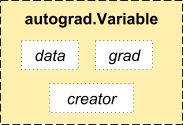

我们通过传入一个 Tensor 去构造 Variable，同时可以指定 2 个参数：

requires_grad (bool)：决定是否对 Variable 微分，如果 requires_grad=True，计算过程将被追踪，此变量的梯度将累积到 .grad 属性中。

volatile (bool)：直译为「挥发」，如果 volatile=True，则构建在该 Variable 之上的图都不会微分，此参数为模型推理阶段设计。

与 TensorFlow 的自动微分过程相似，PyTorch 同样用到了计算图。特别地，PyTorch 还是动态运算图（Dynamic Computation Graph），它可以让我们的计算模型更灵活、复杂，并可以让反向传播算法随时进行。

下面，我们就通过一个例子计算一下。首先创建一个示例张量，这里有两种方法。

In [23]:
# 方法 1：创建张量并使用 Variable 封装：
from torch.autograd import Variable

x = Variable(t.ones(3, 4), requires_grad=True)
x

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]], requires_grad=True)

In [24]:
# 方法 2：使用 PyTorch 提供的方法创建张量时指定 requires_grad=True 即默认使用 Variable 封装，更为简单：
x = t.ones(3, 4, requires_grad=True)
x

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]], requires_grad=True)

In [26]:
print(x.data)
print(x.grad)
print(x.grad_fn)
# 因为这里没有计算过程，所以 grad 和 grad_fn 都是 None。我们可以对 x 执行一次运算：

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
None
None


In [27]:
y = x + 2
print(y)
y.grad_fn

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]], grad_fn=<AddBackward0>)


此时，grad_fn 就追踪到了计算过程。而此时的计算图就是这样：

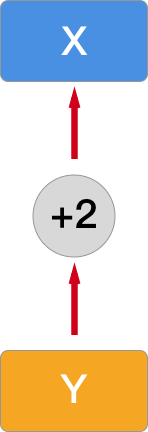

接下来，我们让计算图更加复杂一点，这里添加求均值的复合运算过程：

In [28]:
z = t.mean(y.pow(3))
print(z)
z.grad_fn

tensor(27., grad_fn=<MeanBackward0>)


然后，计算图变成了下面这样：

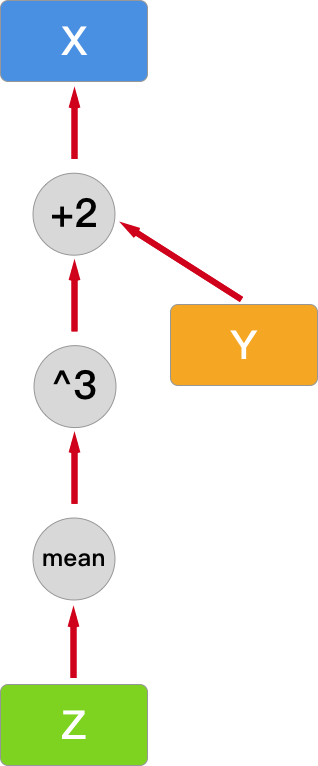


此时，你可以使用 backward 进行反向传播，并计算所有叶子节点的导数（梯度）。注意，Z 和 Y 都不是叶子节点，所以都没有梯度信息。

**叶子节点是什么：其实就是被求导的那个x才是，就是函数的底层而非上层，由于图是向下画的反直觉，y=x+2 z=mean((x+2)^3)**

In [29]:
z.backward()
print(z.is_leaf, y.is_leaf, x.is_leaf)
print(z.grad)
print(y.grad)
print(x.grad)

False False True
None
None
tensor([[2.2500, 2.2500, 2.2500, 2.2500],
        [2.2500, 2.2500, 2.2500, 2.2500],
        [2.2500, 2.2500, 2.2500, 2.2500]])


/tmp/ipykernel_335/15812736.py:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:486.)
  print(z.grad)
/tmp/ipykernel_335/15812736.py:4: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more infor

注意，由于梯度是会累计的，所以重复运行计算 Z 的代码就相当于修改了计算图，相应的梯度值也会发生变化。除此之外，如果你重复运行 backward() 会报错，原因是前向传递过程之后将所需数值保存为 buffer，当计算完梯度之后会自动清空。如果想要多次反向传播，那就需要通过 backward(retain_graph=True) 参数来保证 buffer 的持久性。

下面，我们再通过一个例子对比 Autograd 的自动求导和手动求导数的过程。首先，创建一个随机 Tensor，并开启 requires_grad=True：

In [30]:
x = t.randn(3, 4, requires_grad=True)
x

tensor([[-1.5739,  0.2208, -2.3107, -0.3168],
        [-0.8701,  0.0476,  0.0222, -0.4191],
        [ 0.5637, -0.3982, -0.9944, -0.7782]], requires_grad=True)

你可能还记得 Sigmoid 函数及它对应的导数公式：

### Sigmoid 函数
\[ g(z) = \frac{1}{1 + e^{-z}} \]

### Sigmoid 函数的导数
\[ g'(z) = g(z) \cdot (1 - g(z)) \]
接下来，手动实现 Sigmoid 函数，及对应的导数求解函数：

In [31]:
def sigmoid(x):
    """sigmoid 函数"""
    return 1.0/(1.0 + t.exp(-x))

def sigmoid_derivative(x):
    """sigmoid 函数求导"""
    return sigmoid(x)*(1.0-sigmoid(x))

In [32]:
y = sigmoid(x)  # 张量通过 sigmoid 计算
y

tensor([[0.1717, 0.5550, 0.0902, 0.4215],
        [0.2952, 0.5119, 0.5055, 0.3967],
        [0.6373, 0.4017, 0.2701, 0.3147]], grad_fn=<MulBackward0>)

然后，我们可以通过 Autograd 机制得到导数计算结果。这里需要使用到 backward，并传入一个形状与 y 一致的 gradient：

In [33]:
y.backward(gradient=t.ones(y.size()))
x.grad

tensor([[0.1422, 0.2470, 0.0821, 0.2438],
        [0.2081, 0.2499, 0.2500, 0.2393],
        [0.2311, 0.2403, 0.1971, 0.2157]])

In [34]:
sigmoid_derivative(x)

tensor([[0.1422, 0.2470, 0.0821, 0.2438],
        [0.2081, 0.2499, 0.2500, 0.2393],
        [0.2311, 0.2403, 0.1971, 0.2157]], grad_fn=<MulBackward0>)

当然，可以通过 sigmoid_derivative() 函数手动求导，查看计算结果：

你会看到，使用 Autograd 机制得到的计算结果和手动计算结果是一致的。

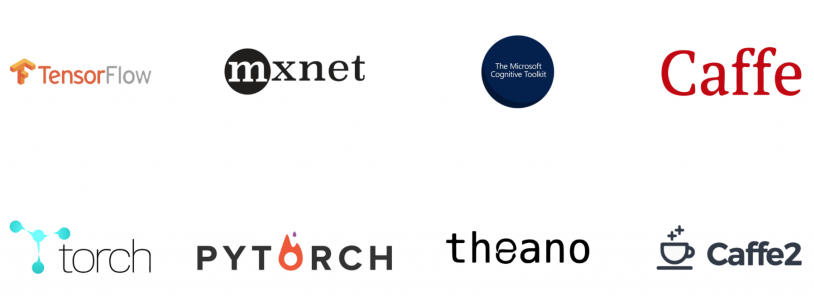

 [机器之心](https://mp.weixin.qq.com/s?__biz=MzA3MzI4MjgzMw==&mid=2650726576&idx=3&sn=4140ee7afc67928333e971062d042c59&chksm=871b24ceb06cadd8922cde50cbc5da6a04fd3f00a78964381c593b2dcf62bb78835159a00f27&scene=0#rd)有一篇文章 对各个框架介绍的非常详细，在这里就不需要过多叙述每个框架的特性。机器学习框架非常多，不可能每一个都学一遍，这是不现实的，只能挑一个更适合自身情况的、感兴趣的框架进行深入学习。

MXNet、CNTK 分别是由 Amazon、Microsoft 两家顶级公司开发，两个框架都做得非常优秀和易用，但是却不温不火。在知乎上有两个问题专门讨论这两个框架火不起来的原因，如果感兴趣，可以去了解这段历史。

 为什么 CNTK 知名度和普及率不如 Tensorflow、Theano、caffe、Torch？
 为什么强大的 MXNet 一直火不起来？
Torch 和 Theano 是比较早期的两个框架，对深度学习框架的发展影响深远。Torch 是基于 Lua 这门比较冷门的语言开发。Theano 是三大神之一的 Bengio 开发，但是已经停止维护了。

Keras 是一个高层次的神经网络 API，它最初是基于 Theano 框架开发的，并且后来也支持了 TensorFlow 和 CNTK。Keras 的设计理念是提供一种简单易用、高效灵活的 API，使得用户可以快速地搭建和训练神经网络模型。Keras 的高层次封装确实让它非常易于上手，同时也使得用户很难去修改训练细节。后来，由于 TensorFlow 的兴起，Keras 成为了 TensorFlow 的官方高层次 API。

Caffe 是一个基于 C++ 实现的深度学习框架，主要用于图像识别和计算机视觉领域。Caffe 最初是由贾扬清在 UC Berkeley 开发并开源的，后来得到了众多研究者和开发者的支持和贡献。Caffe 因为非常快的处理速度被广泛应用。近年来，由于 TensorFlow、PyTorch 等框架的推出和快速发展，Caffe 的市场份额逐渐下降。Caffe2 是 Caffe 的一个后续版本，主要是为了支持更广泛的硬件和平台，并且具有更好的可扩展性和灵活性。Caffe2 后来被并入了 PyTorch 社区，并成为了 PyTorch 的一部分，提供了更高效的模型训练和推理功能。。

其他的框架，例如百度开发的 PaddlePaddle，腾讯开发的 NCNN，这里不再多做介绍。这些框架多用于相关企业的内部项目或合作项目中。

综上所述，现有的选择就是两个主流的深度学习框架：TensorFlow 和 PyTorch。在这篇  PyTorch vs TensorFlow — spotting the difference 文章中，详细对比了两个框架，可能要比本次实验介绍的更加详细。两个框架分别由两个大公司开发，总体来讲都很好。

PyTorch 的优势
 对用户更友好

知乎  如何评价 PyTorch 1.0 Roadmap？ 的问答中，几乎全都是吐槽 TensorFlow，并且赞美 PyTorch 易用性的回答。

PyTorch 的易用具体表现在容易调试，直接使用最基本的 print 或者 PyCharm 的 debugger 就能一步步调试看输出，而 TensorFlow 需要使用 tfdbg，如果要调试 Python 原生代码还需要使用其他工具。PyTorch 自带了许多已经写好的模块，如数据加载、预处理等，并且用户实现自定义模块也非常方便，可能只需要继承某各类，然后写几个方法就可以。但是在 TensorFlow 中，每定义一个网络，都需要声明、初始化权重、偏置等参数，所以需要写大量的重复代码。而 PyTorch 在 nn.Module 模块提供了很多卷积层、池化层等深度学习的结构，相对 TensorFlow 的抽象层次要高，所以非常方便。

 代码可阅读性非常强

PyTorch 之所以叫 PyTorch，就是因为他是用 Python 实现的，除非是非常底层的如矩阵计算才会用 C/C++ 实现，然后用 Python 封装。众所周知，Python 代码的可阅读性和 C++ 完全不在一个层次。

举个例子，PyTorch 实现的  torchvision 模块包含了很多图像的预处理、加载、预训练模型等，全部是用 Python 实现，可以去阅读里面的代码实现。比如  图片翻转、 AlexNet 在 PyTorch 中是如何实现的。而 TensorFlow 就麻烦多了。

 文档更有好

PyTorch 拥有非常好的 API 文档、入门教程。对于每个实现的 Loss Function 都会介绍他的实现原理、论文地址、数学公式等，可能目的就是使用户能更理解框架。有很多说法是 TensorFlow 的文档更多，官方入门教程有中文。但其实吧，一个外国公司翻译的东西，总会有点理解上的问题。这些文档读上去非常怪异，还不如直接读原文。

TensorFlow 的优势
 可视化方便

TensorFlow 的 Tensorboard 非常好用，可以可视化模型、曲线等等。Tensorboard 会将数据保存到本地用来自己自定义可视化。

当然 PyTorch 也有可视化工具，例如 Facebook 提供的  Visdom 可以方便地进行模型训练和结果展示，它提供了丰富的可视化功能，包括曲线图、散点图、条形图等等，可以帮助用户实时地监控和分析模型的训练过程和结果。另外 PyTorch 还可以通过  tensorboardX 调用 Tensorboard 进行可视化。

 部署方便

无论是在服务器部署还是移动端部署，PyTorch 都几乎是完败的，毕竟 Google 在 AI 领域的地位是独一无二的。

服务器部署 TensorFlow 有  TensorFlow Serving，移动端部署有  TensorFlow Lite 将模型压缩到极致，运行速度也非常快，支持 Android 和 iOS，还有  TensorFlow.js 直接调用 WebGL 预测模型。

PyTorch 在 1.0 版本之后将 Caffe2 合并至 PyTorch，这使得 PyTorch 具备了更好的部署和生产能力。Caffe2 提供了一些强大的工具和功能，包括模型优化、模型转换、模型部署等等，可以帮助用户更好地将 PyTorch 模型用于生产环境。此外，PyTorch 引入了 JIT（Just-In-Time）编译器，可以将 PyTorch 的动态图转换为静态图，提高模型的运行效率和性能。PyTorch 也提供了一些用于模型部署的工具和框架，例如 ONNX（Open Neural Network Exchange）格式，可以将 PyTorch 模型转换为其他框架（如 TensorFlow、Caffe2 等）所支持的格式，以方便模型在不同平台上的部署和使用。

用户可以选择不同的部署方式，例如使用 Flask、Django 等 Web 框架，或者使用其他的模型部署工具和平台，如 AWS SageMaker 等等。不过，这些部署方式可能相对比较麻烦和复杂，需要一定的技术和经验支持。

 社区完善

TensorFlow 的市场占有率非常高，用的人多，网络上有非常多的资源、博客等介绍 TensorFlow，而 PyTorch 相对来说比较新，所以可能更多的是英文，现在 PyTorch 也在慢慢的追赶。另外很多云服务商都提供支持 TensorFlow 的机器学习平台运行云服务器训练模型，但是不一定支持 PyTorch。

没有十全十美的框架，即使是 TensorFlow 发展这么多年也一直存在很多问题。在  TensorFlow 有哪些令人难以接受的地方？ 和  PyTorch 有哪些坑/bug？ 都有详细的讨论。只能根据自己的需求来选择合适的框架。具体讨论到如何选择框架，我们根据不同人群介绍：

 如果你是学生或者科研人员

学生以及科研人员时间比较多，可以花很多时间来学习。最好的选择是两个框架都熟悉，主要使用一个框架的同时对另外一个也有一定了解，至少看得懂代码。

在学术领域用各种框架的都有，但是主要还是集中在 TensorFlow 和 PyTorch（Caffe 主要集中在计算机视觉）。如果是学生但是以后会工作，Researcher 但是偏向工程或需要工程方面的应用，那么可能需要偏重于 TensorFlow 的使用上。如果是学生但是偏向于科研，Researcher 希望能够快速实现自己的算法，跑出一个原型，那么灵活的 PyTorch 会更适合。

 如果你已经工作

对于已经工作的来说，时间可能并不充裕，所以根据自己的能力选择一门框架深入理解。来学习这门课程，肯定是基于对人工智能、机器学习感兴趣的。如果对以后希望从事这个行业，拿机器学习当饭碗，那么必然是选择 TensorFlow。如果仅仅是基于兴趣，希望接触新的行业，那么 PyTorch 更容易入门，是个更好的选择。

综上所述，可能需要根据自己的偏向来选择合适的框架。并不是按照上面所以理解的就一定要选择某一个。框架毕竟是框架，而不是基础知识，能理解框架底层是如何运行的，比如说 Batch Norm 是如何实现的能力，才是最重要的。希望可以意思到，框架只是一个工具，如果不理解原理，也就只能当一个外围人员，俗称调包侠。

在本节实验中，我们了解了 PyTorch 中最重要的几个组件，它们分别是：Tensor，Autograd，nn 以及 Optimizer，了解并掌握这些组件之后就可以完成深度神经网络的搭建了。在本节实验中积累的经验非常重要，因为你在以后的实验中会一直用到今天学习的知识点。